# Hawks and Rabbits

In [1]:
#@title
# Import necessary libraries
from os.path import basename, exists
from os import mkdir

def download(url,folder):
    filename = folder + basename(url)
    if not exists(folder):
        mkdir(folder)
    # fetches the file at the given url if it is not already present
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Notebooks/'
        + 'ModSimPy_Functions/modsim.py', 'ModSimPy_Functions/')

from ModSimPy_Functions.modsim import *
import pandas as pd
import numpy as np

Downloaded ModSimPy_Functions/modsim.py


In [2]:
def make_system(k1, k2, k3, c1, c2, dt, t_sim, iR, iH):

    init = pd.Series(dict(R=iR, H=iH),dtype=np.float64)
    system = dict(init=init,
                  k1=k1,k2=k2,
                  k3=k3, c1=c1, c2=c2,dt=dt,
                  t_end=t_sim)
    
    return system, init


In [3]:
def slope_func(t, state, system):
    R, H = state
    k1, k2, k3, dt = system['k1'],system['k2'], system['k3'], system['dt']
    c1, c2 = system['c1'], system['c2'] 

    if R > 0.5:
        R_min = 0.5
    else:
        R_min = R    
    dRdt = (k1 * R) - (k2*R*H) - (k3*R)
    dHdt = (c1 * H * R) - (c2 * (H/R_min))
    
    return dRdt, dHdt

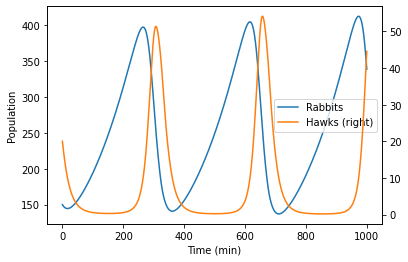

In [4]:
k1 = 0.01       # Rabbit births
k2 = 0.0005     # Hawk-caused rabbit deaths
k3 = 0.005      # Natural rabbit deaths

c1 = 0.0004       # Hawk births
c2 = 0.05        # Hawk deaths
dt = 1.0; t_sim = 1000.0; iR = 150; iH = 20
system, state = make_system(k1, k2, k3, c1, c2, dt, t_sim, iR, iH)

t_array = np.arange(0, system['t_end']+1, system['dt'])
results, details = run_solve_ivp(system, slope_func,t_eval=t_array)

# Plots both the primary data 'X' and the secondary axis 'ax_second'
#results.plot(xlabel='Time (year)', ylabel='Population', legend=True);

# Creates an 'axis' object that gets carried into the next plot() function
ax_second = results.plot(y='R', color='C0',  
             label='Rabbits',legend=True)

# Plots both the primary data 'X' and the secondary axis 'ax_second'
results.plot(y='H', color='C1', secondary_y=True, ax=ax_second, 
             label='Hawks', xlabel='Time (min)',ylabel='Population', 
               legend=True);

In [5]:
np.mod(7,4)

3